# DATASET ANALYSIS AND TRENDS DEMONSTRATION

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## DATA CLEANING

#### Reading the dataset

In [209]:
df = pd.read_csv(r'mobile_sales_dataset.csv')
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [211]:
df['Mobile'] = df['Mobile'].str.strip()

#### Removing Duplicates

In [212]:
s = df.duplicated().sum()
print(f"No of duplicate data in dataset = {s}")

No of duplicate data in dataset = 108


In [213]:
df.drop_duplicates(keep='first', inplace=True)
s = df.duplicated().sum()
print(f"No of duplicate data in dataset = {s}")

No of duplicate data in dataset = 0


#### Removing NaN values

In [214]:
df.isna().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  40
Storage                 39
Camera                   0
Rating                 130
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

In [215]:
df = df.dropna()
df.isna().sum()

Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64

## GRAPHICAL ANALYSIS OF VARIOUS FEATURES

### 1. BRANDWISE DISTRIBUTION

In [216]:
Brands = df['Brands'].value_counts()
df_brands = Brands.reset_index()
df_brands.columns = ['Brands','Count']
df_brands

,Brands,Count
0,SAMSUNG,673
1,realme,276
2,Apple,257
3,OPPO,248
4,Xiaomi,191
5,Nokia,183
6,Infinix,150
7,GIONEE,126
8,Lenovo,116
9,vivo,114


In [217]:
threshold = 110
df_main = df_brands[df_brands['Count'] >= threshold]
df_others = df_brands[df_brands['Count'] < threshold]
others_count = df_others['Count'].sum()
df_main.loc[len(df_main.index)] = ['Others', others_count]
sm = df_brands['Count'].sum()

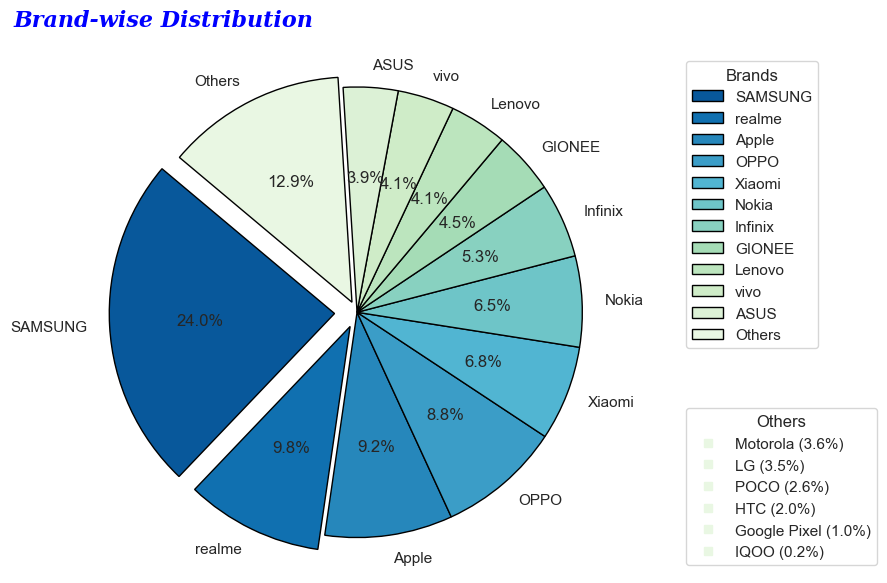

In [218]:
#choosing color palette
colors = sns.color_palette("GnBu", len(df_main))[::-1]
#adjusting explode
explode = [0] * len(df_main)
explode[0] = 0.1
explode[1] = 0.07
explode[-1] = 0.05
#ploting pie chart with requires settings
fig, ax = plt.subplots(figsize=(9,6))
wedges, texts, autotexts = ax.pie(
    df_main['Count'],
    labels=df_main['Brands'],
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor='black') 
)
#making appropiate legends
percentages = [f'{p:.1f}%' for p in (df_others['Count'] / sm * 100)]
legend_labels = [f'{label} ({percentage})' for label, percentage in zip(df_others['Brands'], percentages)]
legend1 = ax.legend(wedges, df_main['Brands'], title="Brands", loc="upper left", bbox_to_anchor=(1, 1))
other_handles = [plt.Line2D([0], [0], marker='s', linestyle='None', color=colors[-1]) for _ in df_others['Brands']]
legend2 = ax.legend(other_handles, legend_labels, title="Others", loc="lower left", bbox_to_anchor=(1, 0))
ax.add_artist(legend1)

#title customisation and layout
plt.title("Brand-wise Distribution", pad=20 , loc="left" ,fontdict={'family':'serif','color':'Blue','weight':'bold','size': 16,
                                                                    'style':'italic','stretch':'expanded'})
ax.axis('equal')
plt.tight_layout()
plt.show()

we can see that Samsung has the lead, followed by Realme and Apple

### 2. BRAND MODELWISE DISTRIBUTION

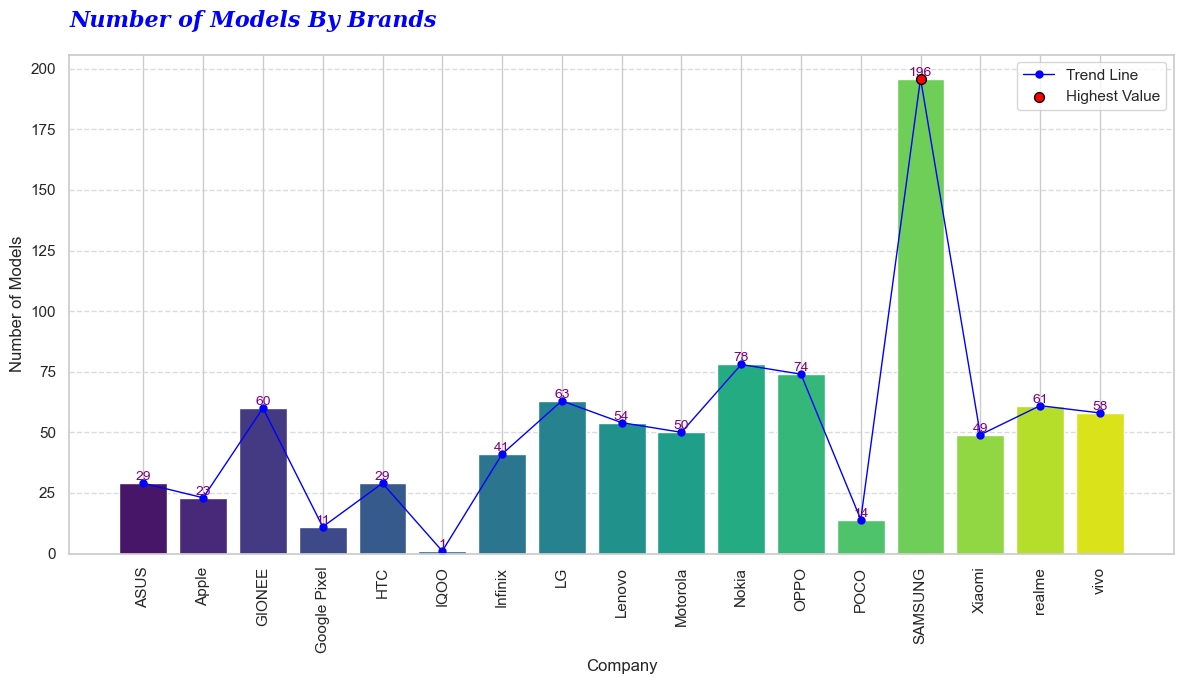

In [219]:
# Calculate the number of unique models by company
models_of_company = df.groupby('Brands')['Models'].nunique()

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

plt.title("Number of Models By Brands", pad=20 , loc="left" ,fontdict={'family':'serif','color':'Blue','weight':'bold','size': 16,
                                                                    'style':'italic','stretch':'expanded'})

# Create the bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(models_of_company))

# Create the bar plot
bars = plt.bar(models_of_company.index, models_of_company.values, color=custom_palette)

# Add a curve line
x = np.arange(len(models_of_company))
plt.plot(x, models_of_company.values, color='blue', marker='o', linestyle='-', linewidth=1, markersize=5, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', va='bottom', ha='center', fontsize=10, color='purple')

# Mark the highest value
max_value = models_of_company.max()
max_index = models_of_company.idxmax()
plt.scatter(max_index, max_value, color='red', s=50, edgecolor='black', zorder=5, label='Highest Value')

# Add a legend
plt.legend()

# Customize x-axis and y-axis labels
plt.xlabel('Company')
plt.ylabel('Number of Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Samsung produced the most number of models 

### 3. Top 5 Brands and Their Most Sold Mobiles

In [220]:
y = df['Brands'].value_counts().head(5)
c = df['Brands'].value_counts().head(5).index
df_top_brands = df[df['Brands'].isin(c)]
ld = df_top_brands.groupby('Brands').Mobile.value_counts().reset_index()
idx = ld.groupby('Brands')['count'].idxmax()
max_df = ld.loc[idx]
max_df

,Brands,Mobile,count
0,Apple,Apple iPhone 11,19
23,OPPO,OPPO A53,10
97,SAMSUNG,SAMSUNG Galaxy A12,18
292,Xiaomi,Xiaomi 11 Lite NE,9
341,realme,realme X2,12


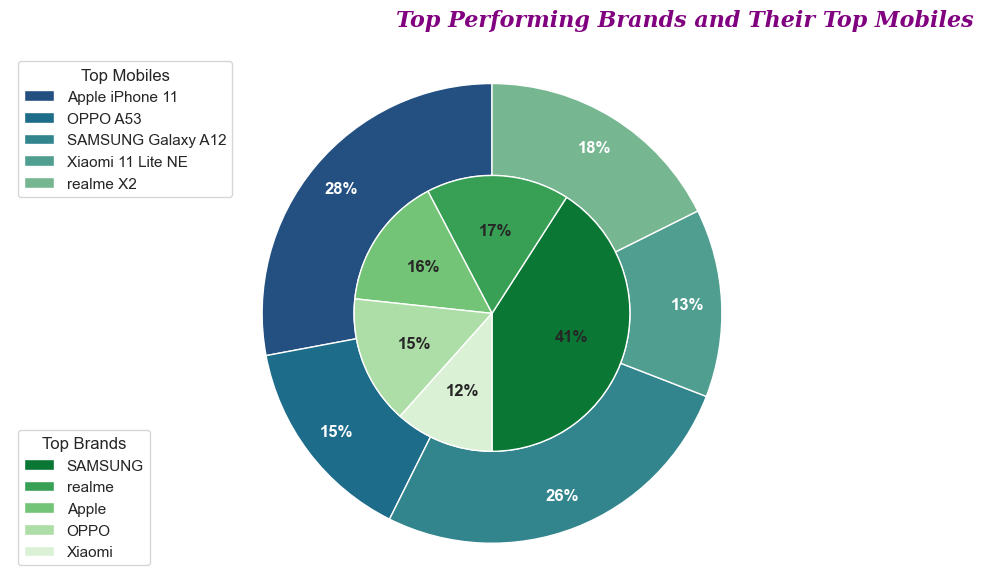

In [221]:

color1 = sns.color_palette("crest", len(max_df))[::-1]
color2 = sns.color_palette("Greens",  len(max_df))[::-1]
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Top Performing Brands and Their Top Mobiles", pad=20 , loc="right" ,fontdict={'family':'serif','color':'Purple','weight':'bold','size': 16,
                                                                    'style':'italic'})
# Plot donut chart
wedges_outer, texts_outer, autotexts_outer = ax.pie(max_df['count'],
                                                    
                                                    autopct='%1.0f%%',
                                                    colors = color1,
                                                    startangle=90,
                                                    pctdistance=0.85)

# Draw circle for donut chart
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Add a new subplot for the inner pie chart
ax_inner = plt.gca()

# Plot pie chart inside donut chart
wedges_inner, texts_inner, autotexts_inner = ax_inner.pie(y,
                                                          autopct='%1.0f%%',
                                                          colors = color2,
                                                          startangle=270,
                                                          radius=0.6)

# Draw circle for inner pie chart to give the effect of a donut chart inside
centre_circle_inner = plt.Circle((0,0),0,fc='white')
fig.gca().add_artist(centre_circle_inner)
legend1 = ax.legend(wedges_outer, max_df['Mobile'], title="Top Mobiles", loc="upper left", bbox_to_anchor=(0, 1))
legend2 = ax.legend(wedges_inner, y.index, title="Top Brands", loc="lower left", bbox_to_anchor=(0, 0))
ax.add_artist(legend1)

plt.setp(autotexts_outer, size=12, weight='bold', color='white')
plt.setp(autotexts_inner, size=12, weight='bold')

plt.tight_layout()
plt.show()

Samsung, Realme, Apple, OPPO and Xiaomi performed better than other brands, and how well their top selling Mobile Performed, incase they have multiple models with same sales only 1 is taken for representation

### 4. Top 10 Most sold Mobile Phones

In [222]:
T10_M = df.Mobile.value_counts().head(10)


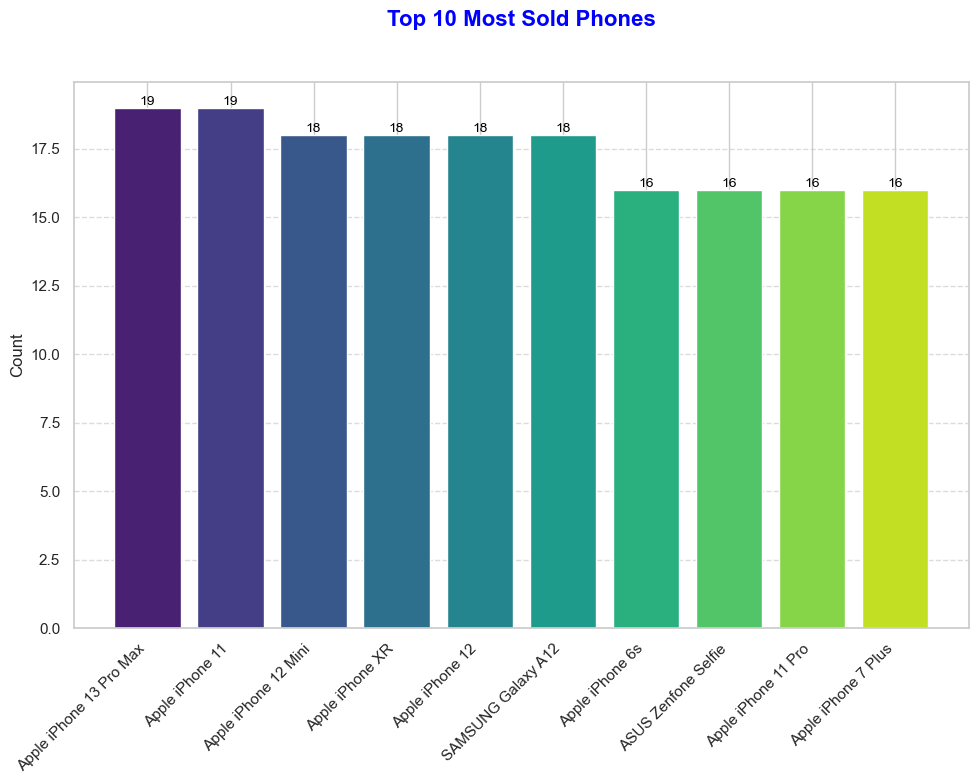

In [223]:
# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Title of the plot
plt.title("Top 10 Most Sold Phones", pad=40 , loc="center" ,fontdict={'color':'Blue','weight':'bold','size': 16,
                                                                        'style':'normal'})

# Create the bar plot with a custom color palette
# If you want to use a color palette, choose a suitable one or create a custom one
custom_palette = sns.color_palette("viridis", 10)

# Create the bar plot
bars = plt.bar(T10_M.index, T10_M.values, color=custom_palette)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', va='bottom', ha='center', fontsize=10, color='black')

# Customize x-axis and y-axis labels

plt.ylabel('Count')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


We can analyse that Apple dominated the market as best selling Brand with multiple of its mobiles occupying the top 10 most sold mobiles.<br>
It might be interesting to look at how well other devices from Apple performed in a distribution lets look below.

##### Apple-Model Distribution

In [224]:
df_Apple = df[df['Brands']=="Apple"]
c_a = df_Apple.Models.value_counts()[::-1]

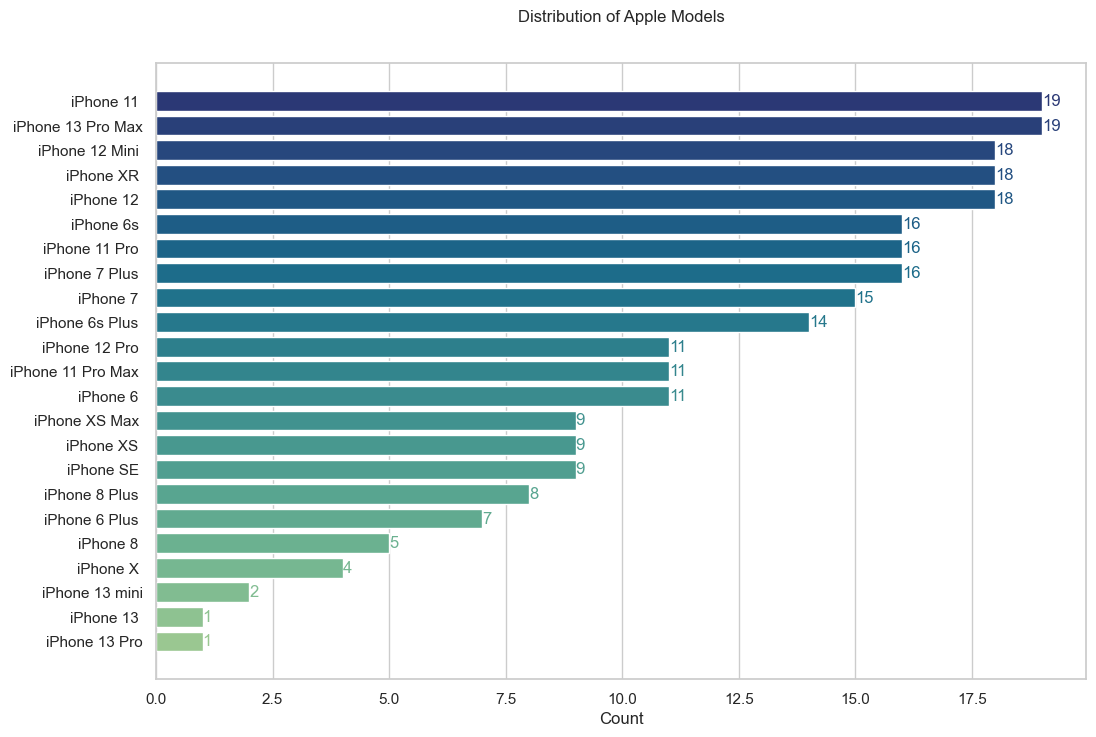

In [225]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Distribution of Apple Models", pad=30)
plt.xlabel('Count')
plt.grid(axis='y', linestyle='none', alpha=1)


custom_palette = sns.color_palette("crest", df_Apple['Models'].nunique()) 
bars = ax.barh(c_a.index, c_a.values, color=custom_palette)


for bar,cl in zip(bars, custom_palette):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', ha='left', color = cl)

# Show the plot
plt.show()

iPhone 11 and iPhone 13 pro max were crowned as best selling mobile from Apple

### 5. Top 10 Model Color

In [226]:
color_count = df.Colors.value_counts().head(10)
color_count

Colors
Black             429
Gold              176
White             147
Blue              130
Silver             84
Red                65
Grey               43
Midnight Black     35
Space Grey         31
Rose Gold          27
Name: count, dtype: int64

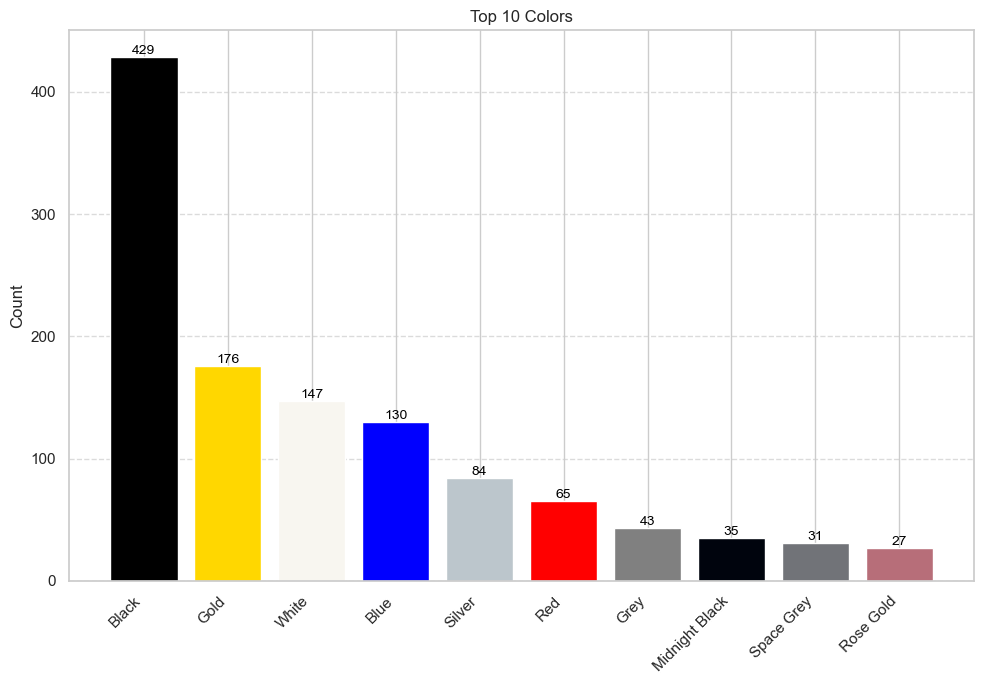

In [227]:
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Title of the plot
plt.title("Top 10 Colors")
custom_palette = ["#000000", "#FFD700", "#F8F6F0","#0000FF","#BCC6CC","#FF0000","#808080","#00040D","#717378","#B76E79"]
# Create the bar plot with a custom color palette
# If you want to use a color palette, choose a suitable one or create a custom one
#custom_palette = sns.color_palette("PuBu", len(color_count))

# Create the bar plot
bars = plt.bar(color_count.index, color_count.values, color=custom_palette)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', va='bottom', ha='center', fontsize=10, color='black')

# Customize x-axis and y-axis labels
plt.ylabel('Count')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

As per the trends Black Color models from multiple brands were preferred by customers over other colors

### 6. Mean Selling Price By Each Brands

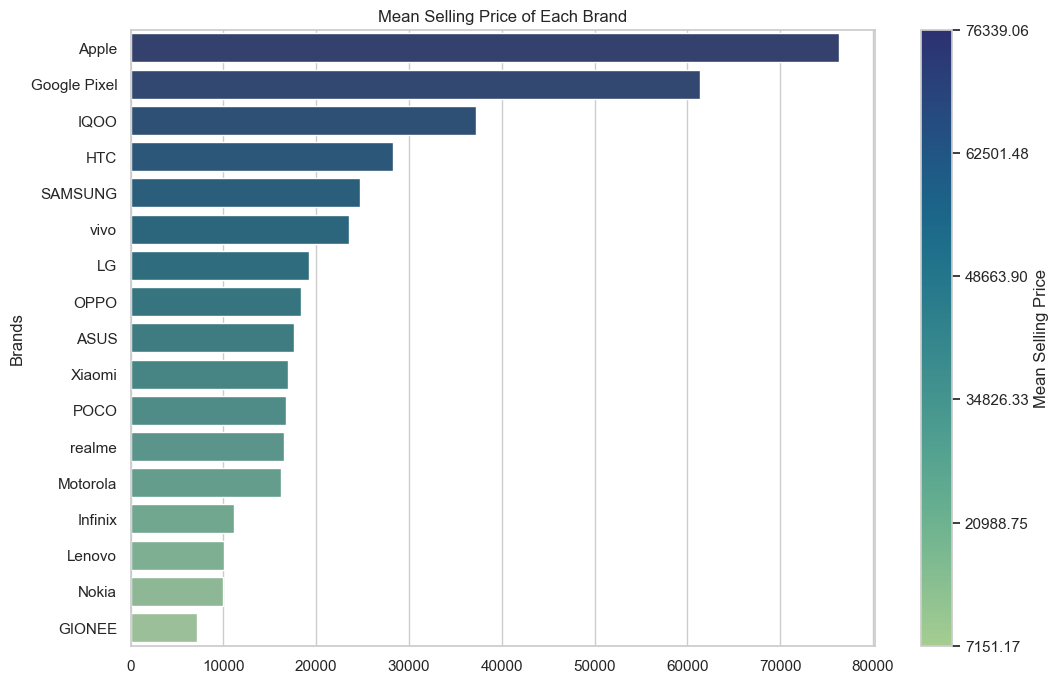

In [228]:
Mean_agg_saleprice = df.groupby('Brands').mean('Selling Price')
Mean_agg_saleprice = Mean_agg_saleprice['Selling Price'].sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_saleprice.mean()  # Set your cutoff value

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Title of the plot
plt.title("Mean Selling Price of Each Brand")

# Create the horizontal bar plot
custom_palette = sns.color_palette("crest", len(Mean_agg_saleprice))[::-1]
sns.barplot(y=Mean_agg_saleprice.index, x=Mean_agg_saleprice.values, palette=custom_palette)

# Draw the cutoff line

# Add a color bar
norm = plt.Normalize(Mean_agg_saleprice.min(), Mean_agg_saleprice.max())
sm = plt.cm.ScalarMappable(cmap='crest', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Selling Price')
cbar.set_ticks(np.linspace(Mean_agg_saleprice.min(), Mean_agg_saleprice.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_saleprice.min(), Mean_agg_saleprice.max(), 6)])

# Show the plot
plt.show()

Price-wise Apple is has the highest mean selling price followed by Google Pixel, IQOO, and so on

### 7. Mean Ratings of Each Brands

In [229]:
brand_rating = df[["Brands","Rating"]]
brand_rating

,Brands,Rating
0,SAMSUNG,4.3
1,Nokia,3.8
3,Infinix,4.2
4,Apple,4.6
5,GIONEE,4.0
...,...,...
3104,LG,3.8
3107,SAMSUNG,4.0
3108,SAMSUNG,4.2
3109,POCO,4.4


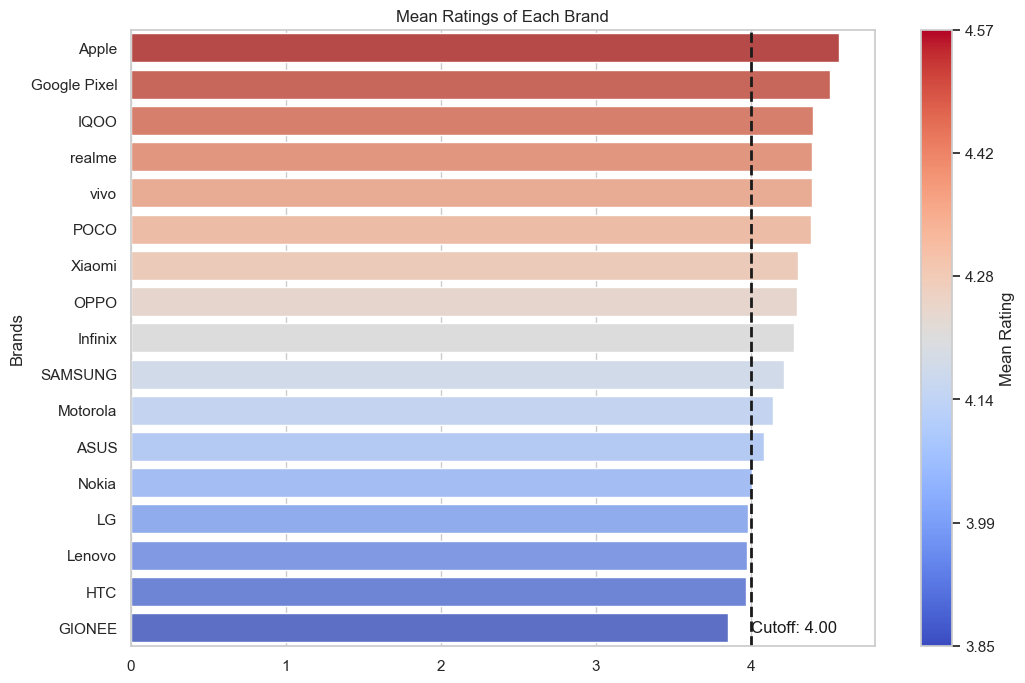

In [230]:
# Calculate mean rating for each brand and sort
Mean_agg_rating = brand_rating.groupby('Brands').mean('Rating')
Mean_agg_rating = Mean_agg_rating.Rating.sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = 4  # Set your cutoff value

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Title of the plot
plt.title("Mean Ratings of Each Brand")

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("coolwarm", len(Mean_agg_rating))[::-1]
sns.barplot(y=Mean_agg_rating.index, x=Mean_agg_rating.values, palette=custom_palette)

# Draw the cutoff line
plt.axvline(x=cutoff_value, color='k', linestyle='--', linewidth=2)

# Add a label for the cutoff line
plt.text(cutoff_value, len(Mean_agg_rating) - 1, f'Cutoff: {cutoff_value:.2f}', color='k', va='center')

# Add a color bar
norm = plt.Normalize(Mean_agg_rating.min(), Mean_agg_rating.max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Rating')
cbar.set_ticks(np.linspace(Mean_agg_rating.min(), Mean_agg_rating.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_rating.min(), Mean_agg_rating.max(), 6)])

# Show the plot
plt.show()

To generalise the visualisation cutoff rating is set to be 4 to see which brands received overall positive response and feedback from customers

### 8. Mean Discount by Each Brand

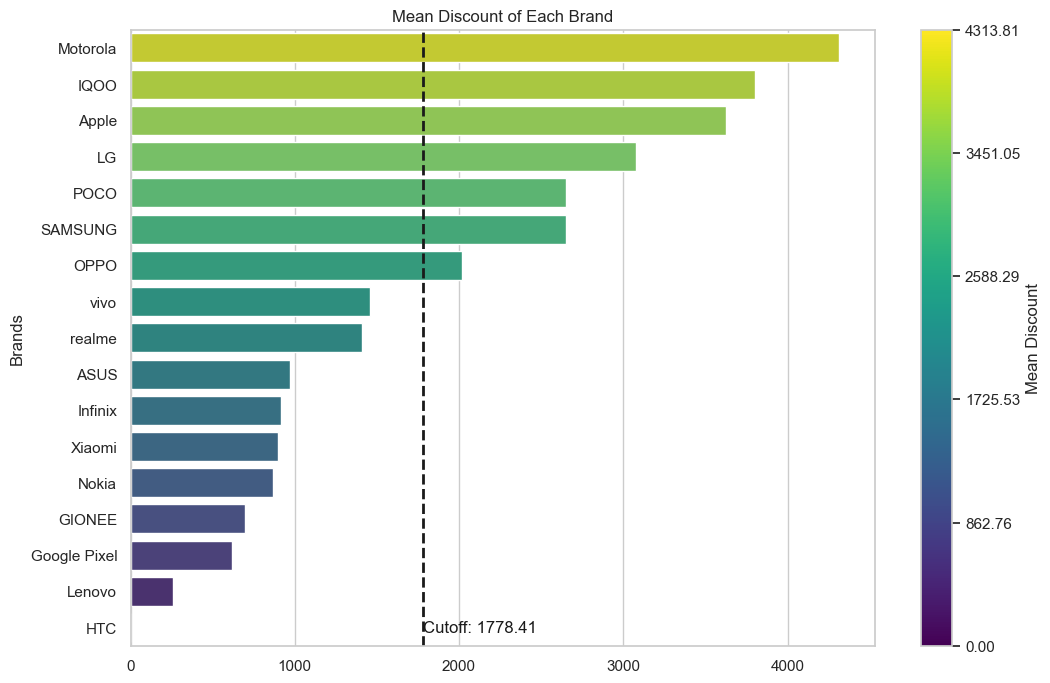

In [231]:
Mean_agg_discount = df.groupby('Brands').mean('Discount')
Mean_agg_discount = Mean_agg_discount.Discount.sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_discount.mean()  # Set your cutoff value

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
plt.title("Mean Discount of Each Brand")

# Create the bar plot without hue
custom_palette = sns.color_palette("viridis", len(Mean_agg_discount))[::-1]  # Reverse the palette to match the sorted order
sns.barplot(x=Mean_agg_discount.values, y=Mean_agg_discount.index, palette=custom_palette, hue=None)

# Draw the cutoff line
plt.axvline(x=cutoff_value, color='k', linestyle='--', linewidth=2)

# Add a label for the cutoff line
plt.text(cutoff_value, len(Mean_agg_rating) - 1, f'Cutoff: {cutoff_value:.2f}', color='k', va='center')

# Add a color bar
norm = plt.Normalize(Mean_agg_discount.min(), Mean_agg_discount.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Discount')
cbar.set_ticks(np.linspace(Mean_agg_discount.min(), Mean_agg_discount.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_discount.min(), Mean_agg_discount.max(), 6)])  # Reverse the tick labels

# Show the plot
plt.show()

Brands with mean rating more than cutoff offered their mobiles at lower price than original more often

### 9. Top 5 Mobiles with Most Discount

In [232]:
top_5_mobiles =df.sort_values("Discount",ascending=False).head(7)
top_5_mobiles = top_5_mobiles[['Mobile','Original Price','Discount']]
top_5_mobiles = top_5_mobiles.drop_duplicates().sort_values('Original Price',ascending=False)
top_5_mobiles

,Mobile,Original Price,Discount
589,Motorola Razr,149999,75000
848,Motorola Razr 5G,149999,60000
410,Apple iPhone XS Max,124900,45901
306,ASUS ROG,83999,57500
507,LG Wing,80000,50001


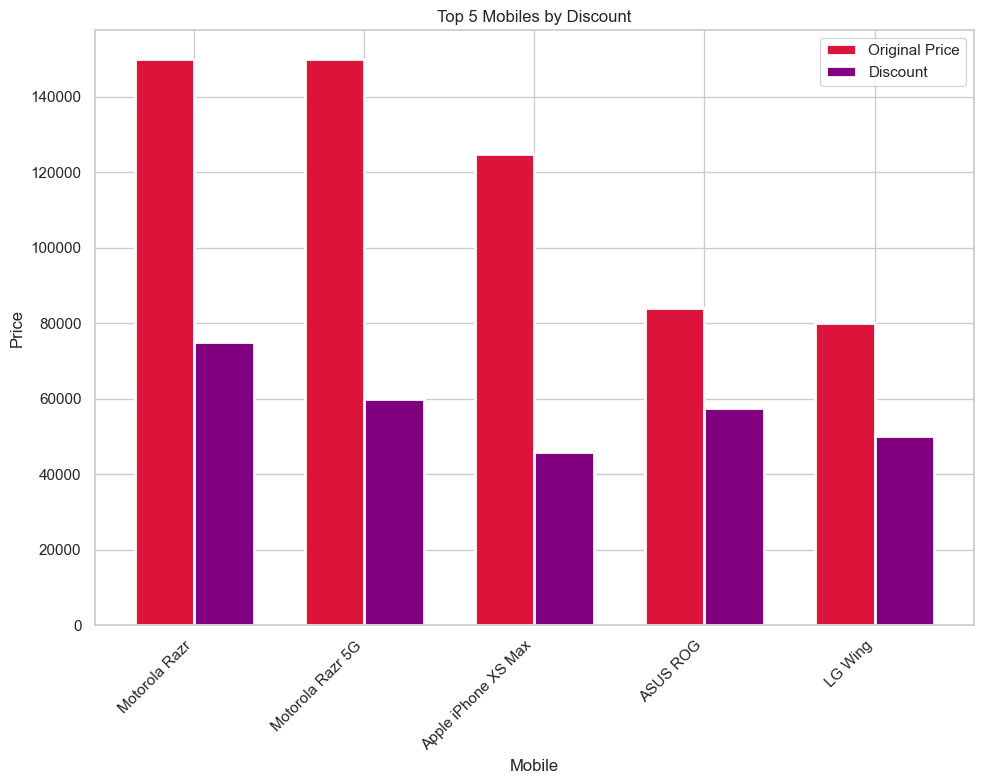

In [233]:
sns.set_theme(style="whitegrid")
bar_width = 0.35
index = np.arange(len(top_5_mobiles['Mobile']))
fig, ax = plt.subplots(figsize=(10, 8))
bar1 = ax.bar(index, top_5_mobiles['Original Price'], bar_width, color="Crimson", linewidth=2, label='Original Price')
bar2 = ax.bar(index + bar_width, top_5_mobiles['Discount'], bar_width, color="Purple", linewidth=2, label='Discount')
ax.set_xlabel('Mobile')
ax.set_ylabel('Price')
ax.set_title('Top 5 Mobiles by Discount')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_5_mobiles['Mobile'], rotation=45, ha='right')

# Adding a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

### 10. Total Revenue Generated by each Brand

In [234]:
Agg_sp = df.groupby('Brands')['Selling Price'].value_counts().reset_index()
Agg_sp['Aggregate_SP'] = Agg_sp['Selling Price'] * Agg_sp['count']
revenue = Agg_sp.groupby('Brands')['Aggregate_SP'].sum().sort_values(ascending=False)

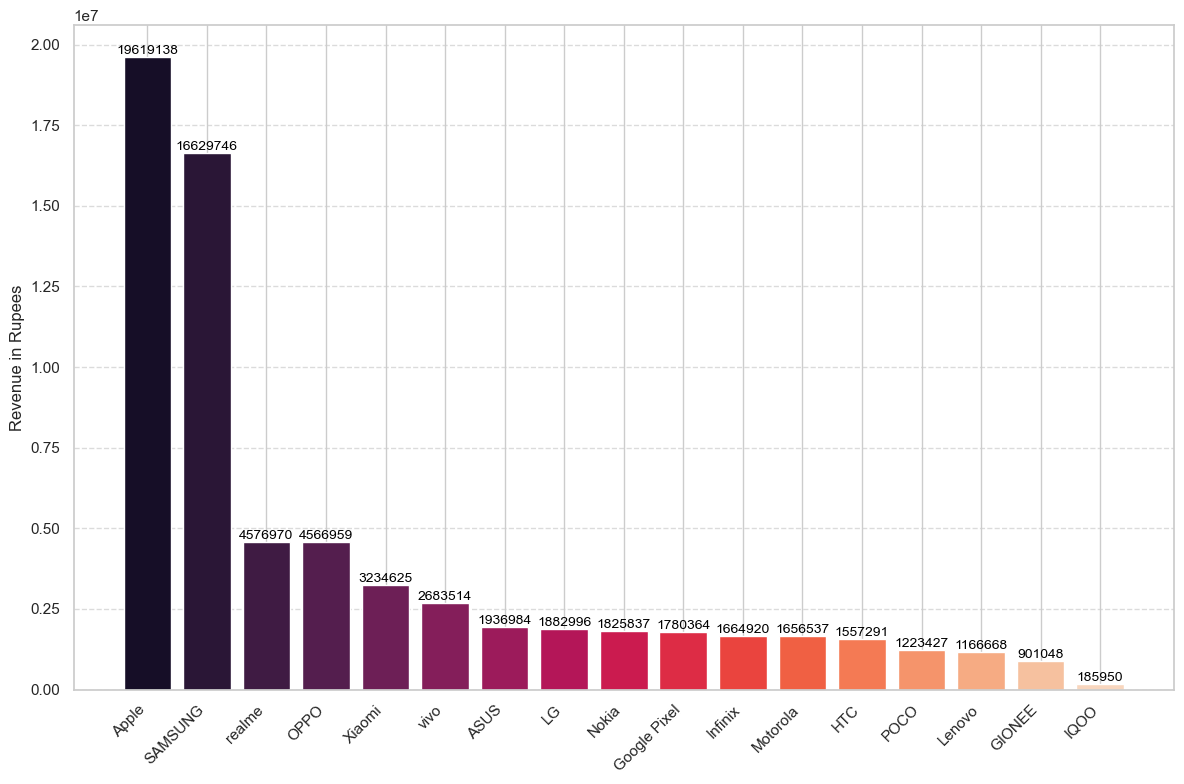

In [235]:
cors = sns.color_palette("rocket", len(revenue))
#adjusting explode
#ploting pie chart with requires settings
plt.figure(figsize=(12, 8))
bars = plt.bar(revenue.index, revenue.values, color=cors)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', va='bottom', ha='center', fontsize=10, color='black')

# Customize x-axis and y-axis labels
plt.ylabel('Revenue in Rupees')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()



From the graph we can conclude that Apple Earned the most revenue followed by Samsung

## Subjective Analysis

Top Brand?

In [246]:
dfr = revenue.reset_index()
dfr.columns = ['Brands','Total Revenue']
dfr.head(1)

,Brands,Total Revenue
0,Apple,19619138


Highest Priced Mobile?

In [239]:
df[df['Selling Price'] == df['Selling Price'].max()].head(1)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
799,Apple,iPhone 13 Pro Max,Sierra Blue,4GB,1 TB,Yes,4.7,179900,179900,Apple iPhone 13 Pro Max,0,0.0


Least Priced Mobile?

In [247]:
df[df['Selling Price'] == df['Selling Price'].min()].head(1)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
1501,Nokia,105,Black,4 MB,4 MB,Yes,4.3,1000,1000,Nokia 105,0,0.0


Most sold Device?

In [252]:
Msd = df.Mobile.value_counts().head(1).reset_index()
Msd

,Mobile,count
0,Apple iPhone 13 Pro Max,19
